In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import plotly.figure_factory as ff

In [2]:
#import dataset
original_election_data = pd.read_csv("election_train.csv")
original_election_data.head()

,Year,State,County,Office,Party,Votes
0,2018,AZ,Apache County,US Senator,Democratic,16298.0
1,2018,AZ,Apache County,US Senator,Republican,7810.0
2,2018,AZ,Cochise County,US Senator,Democratic,17383.0
3,2018,AZ,Cochise County,US Senator,Republican,26929.0
4,2018,AZ,Coconino County,US Senator,Democratic,34240.0


In [3]:
#import dataset
demographic_data = pd.read_csv("demographics_train.csv")
demographic_data.head()

,State,County,FIPS,Total Population,Citizen Voting-Age Population,"Percent White, not Hispanic or Latino","Percent Black, not Hispanic or Latino",Percent Hispanic or Latino,Percent Foreign Born,Percent Female,Percent Age 29 and Under,Percent Age 65 and Older,Median Household Income,Percent Unemployed,Percent Less than High School Degree,Percent Less than Bachelor's Degree,Percent Rural
0,Wisconsin,La Crosse,55063,117538,0,90.537528,1.214075,1.724549,2.976059,51.171536,43.241335,14.702479,51477,4.796952,5.474767,67.529757,16.827753
1,Virginia,Alleghany,51005,15919,12705,91.940449,5.207614,1.432251,1.300333,51.077329,31.660280,23.902255,45538,4.560986,15.537543,83.711604,52.393846
2,Indiana,Fountain,18045,16741,12750,95.705155,0.400215,2.359477,1.547100,49.770026,35.899887,18.941521,45924,7.978789,12.032155,85.538940,65.951276
3,Ohio,Geauga,39055,94020,0,95.837056,1.256116,1.294405,2.578175,50.678579,36.281642,18.028079,74165,4.036902,8.928599,62.730824,63.968990
4,Wisconsin,Jackson,55053,20566,15835,86.662453,1.983857,3.082758,1.376058,46.649810,36.292911,17.587280,49608,5.569698,11.792912,86.129256,72.238251


### Task 1 : Reshape from long format to wide format

In [4]:
election_data = pd.pivot_table(original_election_data, index=['Year','State','County', 'Office'], columns=['Party'], values=['Votes'], aggfunc=np.sum).reset_index()
election_data.columns = election_data.columns.droplevel(1) #removing multi-indexing in attribute Votes
election_data.columns = ["Year", "State", "County", "Office", "Democratic Votes", "Republican Votes"]
print(election_data.count())
election_data.head(10)

Year                1205
State               1205
County              1205
Office              1205
Democratic Votes    1205
Republican Votes    1205
dtype: int64


,Year,State,County,Office,Democratic Votes,Republican Votes
0,2018,AZ,Apache County,US Senator,16298.0,7810.0
1,2018,AZ,Cochise County,US Senator,17383.0,26929.0
2,2018,AZ,Coconino County,US Senator,34240.0,19249.0
3,2018,AZ,Gila County,US Senator,7643.0,12180.0
4,2018,AZ,Graham County,US Senator,3368.0,6870.0
5,2018,AZ,La Paz County,US Senator,1609.0,3265.0
6,2018,AZ,Maricopa County,US Senator,732671.0,672505.0
7,2018,AZ,Mohave County,US Senator,19214.0,50209.0
8,2018,AZ,Navajo County,US Senator,16624.0,18767.0
9,2018,AZ,Pima County,US Senator,221242.0,160550.0


### Task 2 : Addressing inconsistencies in datasets and Merging them

In [5]:
election_data['County'] = election_data['County'].str.replace('County', '')
election_data['County'] = election_data['County'].str.strip()
election_data['State'] = election_data['State'].str.strip()
election_data.head()

,Year,State,County,Office,Democratic Votes,Republican Votes
0,2018,AZ,Apache,US Senator,16298.0,7810.0
1,2018,AZ,Cochise,US Senator,17383.0,26929.0
2,2018,AZ,Coconino,US Senator,34240.0,19249.0
3,2018,AZ,Gila,US Senator,7643.0,12180.0
4,2018,AZ,Graham,US Senator,3368.0,6870.0


In [6]:
states = {'AK': 'Alaska','AL': 'Alabama','AR': 'Arkansas','AS': 'American Samoa','AZ': 'Arizona','CA': 'California',
        'CO': 'Colorado','CT': 'Connecticut','DC': 'District of Columbia','DE': 'Delaware','FL': 'Florida',
        'GA': 'Georgia','GU': 'Guam','HI': 'Hawaii','IA': 'Iowa','ID': 'Idaho','IL': 'Illinois','IN': 'Indiana',
        'KS': 'Kansas','KY': 'Kentucky','LA': 'Louisiana','MA': 'Massachusetts','MD': 'Maryland','ME': 'Maine',
        'MI': 'Michigan','MN': 'Minnesota','MO': 'Missouri','MP': 'Northern Mariana Islands','MS': 'Mississippi',
        'MT': 'Montana','NA': 'National','NC': 'North Carolina','ND': 'North Dakota','NE': 'Nebraska','NH': 'New Hampshire',
        'NJ': 'New Jersey','NM': 'New Mexico','NV': 'Nevada','NY': 'New York','OH': 'Ohio','OK': 'Oklahoma','OR': 'Oregon',
        'PA': 'Pennsylvania','PR': 'Puerto Rico','RI': 'Rhode Island','SC': 'South Carolina','SD': 'South Dakota',
        'TN': 'Tennessee','TX': 'Texas','UT': 'Utah','VA': 'Virginia','VI': 'Virgin Islands','VT': 'Vermont',
        'WA': 'Washington','WI': 'Wisconsin','WV': 'West Virginia','WY': 'Wyoming'}

election_data = election_data.replace({"State":states})
election_data.head()

,Year,State,County,Office,Democratic Votes,Republican Votes
0,2018,Arizona,Apache,US Senator,16298.0,7810.0
1,2018,Arizona,Cochise,US Senator,17383.0,26929.0
2,2018,Arizona,Coconino,US Senator,34240.0,19249.0
3,2018,Arizona,Gila,US Senator,7643.0,12180.0
4,2018,Arizona,Graham,US Senator,3368.0,6870.0


In [7]:
demographic_data['State'] = demographic_data['State'].str.strip()
demographic_data['County'] = demographic_data['County'].str.strip()
demographic_data['State'] = demographic_data['State'].str.upper()
demographic_data['County'] = demographic_data['County'].str.upper()
demographic_data.head()

,State,County,FIPS,Total Population,Citizen Voting-Age Population,"Percent White, not Hispanic or Latino","Percent Black, not Hispanic or Latino",Percent Hispanic or Latino,Percent Foreign Born,Percent Female,Percent Age 29 and Under,Percent Age 65 and Older,Median Household Income,Percent Unemployed,Percent Less than High School Degree,Percent Less than Bachelor's Degree,Percent Rural
0,WISCONSIN,LA CROSSE,55063,117538,0,90.537528,1.214075,1.724549,2.976059,51.171536,43.241335,14.702479,51477,4.796952,5.474767,67.529757,16.827753
1,VIRGINIA,ALLEGHANY,51005,15919,12705,91.940449,5.207614,1.432251,1.300333,51.077329,31.660280,23.902255,45538,4.560986,15.537543,83.711604,52.393846
2,INDIANA,FOUNTAIN,18045,16741,12750,95.705155,0.400215,2.359477,1.547100,49.770026,35.899887,18.941521,45924,7.978789,12.032155,85.538940,65.951276
3,OHIO,GEAUGA,39055,94020,0,95.837056,1.256116,1.294405,2.578175,50.678579,36.281642,18.028079,74165,4.036902,8.928599,62.730824,63.968990
4,WISCONSIN,JACKSON,55053,20566,15835,86.662453,1.983857,3.082758,1.376058,46.649810,36.292911,17.587280,49608,5.569698,11.792912,86.129256,72.238251


In [8]:
election_data['State'] = election_data['State'].str.upper()
election_data['County'] = election_data['County'].str.upper()
merged_data = pd.merge(election_data, demographic_data, how='inner', on=['State','County'])
merged_data.head()

,Year,State,County,Office,Democratic Votes,Republican Votes,FIPS,Total Population,Citizen Voting-Age Population,"Percent White, not Hispanic or Latino",...,Percent Hispanic or Latino,Percent Foreign Born,Percent Female,Percent Age 29 and Under,Percent Age 65 and Older,Median Household Income,Percent Unemployed,Percent Less than High School Degree,Percent Less than Bachelor's Degree,Percent Rural
0,2018,ARIZONA,APACHE,US Senator,16298.0,7810.0,4001,72346,0,18.571863,...,5.947806,1.719515,50.598513,45.854643,13.322091,32460,15.807433,21.758252,88.941063,74.061076
1,2018,ARIZONA,COCHISE,US Senator,17383.0,26929.0,4003,128177,92915,56.299492,...,34.403208,11.458374,49.069646,37.902276,19.756275,45383,8.567108,13.409171,76.837055,36.301067
2,2018,ARIZONA,COCONINO,US Senator,34240.0,19249.0,4005,138064,104265,54.619597,...,13.711033,4.825298,50.581614,48.946141,10.873943,51106,8.238305,11.085381,65.791439,31.466066
3,2018,ARIZONA,GILA,US Senator,7643.0,12180.0,4007,53179,0,63.222325,...,18.548675,4.249798,50.296170,32.238290,26.397638,40593,12.129932,15.729958,82.262624,41.062000
4,2018,ARIZONA,GRAHAM,US Senator,3368.0,6870.0,4009,37529,0,51.461536,...,32.097844,4.385942,46.313518,46.393456,12.315809,47422,14.424104,14.580797,86.675944,46.437399


In [9]:
print(merged_data.count())

Year                                     1200
State                                    1200
County                                   1200
Office                                   1200
Democratic Votes                         1200
Republican Votes                         1200
FIPS                                     1200
Total Population                         1200
Citizen Voting-Age Population            1200
Percent White, not Hispanic or Latino    1200
Percent Black, not Hispanic or Latino    1200
Percent Hispanic or Latino               1200
Percent Foreign Born                     1200
Percent Female                           1200
Percent Age 29 and Under                 1200
Percent Age 65 and Older                 1200
Median Household Income                  1200
Percent Unemployed                       1200
Percent Less than High School Degree     1200
Percent Less than Bachelor's Degree      1200
Percent Rural                            1200
dtype: int64


### Task 3 : Exploring merged dataset 

In [10]:
print(merged_data.dtypes)

Year                                       int64
State                                     object
County                                    object
Office                                    object
Democratic Votes                         float64
Republican Votes                         float64
FIPS                                       int64
Total Population                           int64
Citizen Voting-Age Population              int64
Percent White, not Hispanic or Latino    float64
Percent Black, not Hispanic or Latino    float64
Percent Hispanic or Latino               float64
Percent Foreign Born                     float64
Percent Female                           float64
Percent Age 29 and Under                 float64
Percent Age 65 and Older                 float64
Median Household Income                    int64
Percent Unemployed                       float64
Percent Less than High School Degree     float64
Percent Less than Bachelor's Degree      float64
Percent Rural       

In [11]:
print(merged_data['Year'].unique())

[2018]


In [12]:
print(merged_data['Office'].unique())

['US Senator']


In [13]:
#Removing the columns 'Year' and 'Office' from the dataset
merged_data = merged_data.drop(['Year', 'Office'],axis=1)
merged_data.head()

,State,County,Democratic Votes,Republican Votes,FIPS,Total Population,Citizen Voting-Age Population,"Percent White, not Hispanic or Latino","Percent Black, not Hispanic or Latino",Percent Hispanic or Latino,Percent Foreign Born,Percent Female,Percent Age 29 and Under,Percent Age 65 and Older,Median Household Income,Percent Unemployed,Percent Less than High School Degree,Percent Less than Bachelor's Degree,Percent Rural
0,ARIZONA,APACHE,16298.0,7810.0,4001,72346,0,18.571863,0.486551,5.947806,1.719515,50.598513,45.854643,13.322091,32460,15.807433,21.758252,88.941063,74.061076
1,ARIZONA,COCHISE,17383.0,26929.0,4003,128177,92915,56.299492,3.714395,34.403208,11.458374,49.069646,37.902276,19.756275,45383,8.567108,13.409171,76.837055,36.301067
2,ARIZONA,COCONINO,34240.0,19249.0,4005,138064,104265,54.619597,1.342855,13.711033,4.825298,50.581614,48.946141,10.873943,51106,8.238305,11.085381,65.791439,31.466066
3,ARIZONA,GILA,7643.0,12180.0,4007,53179,0,63.222325,0.552850,18.548675,4.249798,50.296170,32.238290,26.397638,40593,12.129932,15.729958,82.262624,41.062000
4,ARIZONA,GRAHAM,3368.0,6870.0,4009,37529,0,51.461536,1.811932,32.097844,4.385942,46.313518,46.393456,12.315809,47422,14.424104,14.580797,86.675944,46.437399


### Task 4 : Searching missing values in merged data

In [14]:
print(merged_data.isnull().sum())

State                                    0
County                                   0
Democratic Votes                         0
Republican Votes                         0
FIPS                                     0
Total Population                         0
Citizen Voting-Age Population            0
Percent White, not Hispanic or Latino    0
Percent Black, not Hispanic or Latino    0
Percent Hispanic or Latino               0
Percent Foreign Born                     0
Percent Female                           0
Percent Age 29 and Under                 0
Percent Age 65 and Older                 0
Median Household Income                  0
Percent Unemployed                       0
Percent Less than High School Degree     0
Percent Less than Bachelor's Degree      0
Percent Rural                            0
dtype: int64


In [15]:
a = merged_data['County'].count()
b = merged_data['County'][merged_data['Citizen Voting-Age Population']==0].count()
print(a)
print(b)
print("Percentage of missing values = ",b / a * 100)

1200
680
Percentage of missing values =  56.666666666666664


In [37]:
#Removing the column 'Citizen Voting-Age Population' from the dataset
merged_data = merged_data.drop(['Citizen Voting-Age Population'],axis=1)
merged_data

,State,County,Democratic Votes,Republican Votes,FIPS,Total Population,"Percent White, not Hispanic or Latino","Percent Black, not Hispanic or Latino",Percent Hispanic or Latino,Percent Foreign Born,Percent Female,Percent Age 29 and Under,Percent Age 65 and Older,Median Household Income,Percent Unemployed,Percent Less than High School Degree,Percent Less than Bachelor's Degree,Percent Rural,Party
0,ARIZONA,APACHE,16298.0,7810.0,4001,72346,18.571863,0.486551,5.947806,1.719515,50.598513,45.854643,13.322091,32460,15.807433,21.758252,88.941063,74.061076,1
1,ARIZONA,COCHISE,17383.0,26929.0,4003,128177,56.299492,3.714395,34.403208,11.458374,49.069646,37.902276,19.756275,45383,8.567108,13.409171,76.837055,36.301067,0
2,ARIZONA,COCONINO,34240.0,19249.0,4005,138064,54.619597,1.342855,13.711033,4.825298,50.581614,48.946141,10.873943,51106,8.238305,11.085381,65.791439,31.466066,1
3,ARIZONA,GILA,7643.0,12180.0,4007,53179,63.222325,0.552850,18.548675,4.249798,50.296170,32.238290,26.397638,40593,12.129932,15.729958,82.262624,41.062000,0
4,ARIZONA,GRAHAM,3368.0,6870.0,4009,37529,51.461536,1.811932,32.097844,4.385942,46.313518,46.393456,12.315809,47422,14.424104,14.580797,86.675944,46.437399,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,WYOMING,PLATTE,801.0,2850.0,56031,8740,89.359268,0.057208,7.814645,2.780320,47.711670,32.700229,22.013730,41051,3.901047,9.675889,80.300395,58.647744,0
1196,WYOMING,SUBLETTE,668.0,2653.0,56035,10032,91.646730,0.000000,7.814992,2.053429,46.949761,36.393541,13.337321,76004,2.786971,4.658830,75.645069,100.000000,0
1197,WYOMING,SWEETWATER,3943.0,8577.0,56037,44812,79.815674,0.865840,15.859591,5.509685,47.824244,44.153352,9.417120,68233,5.072255,9.314606,78.628507,10.916313,0
1198,WYOMING,UINTA,1371.0,4713.0,56041,20893,87.718375,0.186665,8.959939,3.986981,49.327526,43.205858,10.678218,53323,6.390755,10.361224,81.793082,43.095937,0


### Task 5 : Creating new variable "Party"

In [17]:
#Task 5
merged_data['Party'] = np.where(merged_data['Democratic Votes'] > merged_data['Republican Votes'], 1, 0)
print(merged_data[['Democratic Votes', 'Republican Votes', 'Party']].head())
#merged_data.head()

   Democratic Votes  Republican Votes  Party
0           16298.0            7810.0      1
1           17383.0           26929.0      0
2           34240.0           19249.0      1
3            7643.0           12180.0      0
4            3368.0            6870.0      0


### Task 6 : Computing mean population and performing hypothesis test for 𝜶 = 0.05

In [18]:
demo = merged_data.groupby(['Party']).get_group(1)
repub = merged_data.groupby(['Party']).get_group(0)
alpha = 0.05

In [19]:
print("Mean county population:")
print("For Democratic counties :",demo['Total Population'].mean())
print("For Republican counties :",repub['Total Population'].mean())
print(demo['Total Population'].mean() > repub['Total Population'].mean())

Mean county population:
For Democratic counties : 300998.3169230769
For Republican counties : 53974.214857142855
True


In [20]:
[statistic,pvalue] = st.ttest_ind(demo['Total Population'],repub['Total Population'],equal_var=False)
print("t =",statistic)
print("p value =",pvalue," = ",format(pvalue,'.16f'))
print(pvalue < alpha)

t = 8.001207114045041
p value = 2.0965719353509958e-14  =  0.0000000000000210
True


### Task 7 :  Computing mean median household income and performing hypothesis test for 𝜶 = 0.05

In [21]:
print("Mean median household income:")
print("For Democratic counties :",demo['Median Household Income'].mean())
print("For Republican counties :",repub['Median Household Income'].mean())
print(demo['Median Household Income'].mean() > repub['Median Household Income'].mean())

Mean median household income:
For Democratic counties : 53798.732307692306
For Republican counties : 48724.15085714286
True


In [22]:
[statistic,pvalue] = st.ttest_ind(demo['Median Household Income'],repub['Median Household Income'],equal_var=False)
print("t =",statistic)
print("p value =",pvalue," = ",format(pvalue,'.10f'))
print(pvalue < alpha)

t = 5.507012409466501
p value = 6.173239891230373e-08  =  0.0000000617
True


### Task 8 : Computing descriptive statistics and creating plots

#### For Age

In [23]:
pd.options.mode.chained_assignment = None  # default='warn'
age_data = merged_data[['Percent Age 29 and Under','Percent Age 65 and Older','Party']]
age_data['Percent Age 29 to 65'] = 100 - age_data['Percent Age 29 and Under'] - age_data['Percent Age 65 and Older']
#list(age_data.columns.values)
age_data = age_data[['Percent Age 29 and Under','Percent Age 29 to 65','Percent Age 65 and Older','Party']]
age_data.groupby('Party').describe().transpose()

Party                                    0           1
Percent Age 29 and Under count  875.000000  325.000000
                         mean    36.020984   38.726959
                         std      5.179824    6.252786
                         min     11.842105   23.156452
                         25%     33.003249   34.488444
                         50%     35.864651   38.074151
                         75%     38.548722   42.161162
                         max     58.749116   67.367823
Percent Age 29 to 65     count  875.000000  325.000000
                         mean    45.164018   45.078214
                         std      2.909028    3.907598
                         min     27.421759   18.433769
                         25%     43.506682   43.741937
                         50%     45.554480   45.817819
                         75%     46.980099   47.448269
                         max     63.157895   57.478906
Percent Age 65 and Older count  875.000000  325.000000
                         mean    18.814997   16.194826
                         std      4.733641    4.282422
                         min      6.954387    6.653188
                         25%     15.781389   13.106233
                         50%     18.377039   15.698087
                         75%     21.109296   18.806426
                         max     37.622759   31.642106

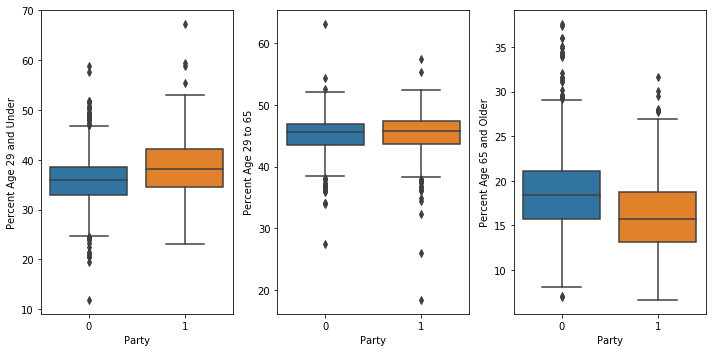

In [24]:
num_columns = len(age_data.columns)
fig, axes = plt.subplots(1, num_columns-1, figsize = (10, 5))
for i in range(num_columns-1):
    sns.boxplot(x = 'Party', y = age_data.columns[i], data = age_data, orient = 'v', ax = axes[i])
plt.tight_layout()

#### For Gender

In [25]:
gender_data = merged_data[['Percent Female', 'Party']]
gender_data['Percent Male'] = 100 - gender_data['Percent Female']
gender_data = gender_data[['Percent Female','Percent Male','Party']]
gender_data.groupby('Party').describe().transpose()

Party                          0           1
Percent Female count  875.000000  325.000000
               mean    49.617156   50.385433
               std      2.447883    2.149359
               min     21.513413   34.245291
               25%     49.207916   49.854280
               50%     50.174456   50.653830
               75%     50.827181   51.492075
               max     55.885023   56.418468
Percent Male   count  875.000000  325.000000
               mean    50.382844   49.614567
               std      2.447883    2.149359
               min     44.114977   43.581532
               25%     49.172819   48.507925
               50%     49.825544   49.346170
               75%     50.792084   50.145720
               max     78.486587   65.754709

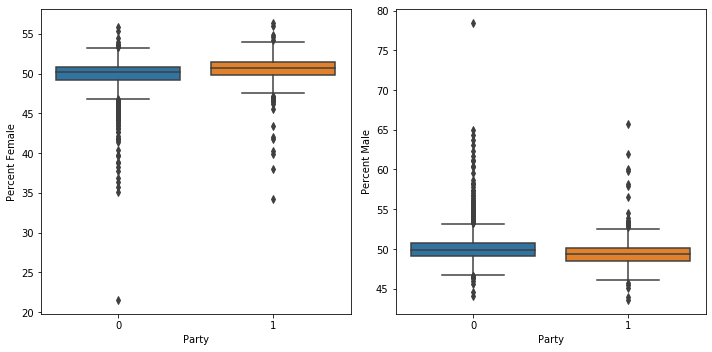

In [26]:
num_columns = len(gender_data.columns)
fig, axes = plt.subplots(1, num_columns-1, figsize = (10, 5))
for i in range(num_columns-1):
    sns.boxplot(x = 'Party', y = gender_data.columns[i], data = gender_data, orient = 'v', ax = axes[i])
plt.tight_layout()

#### For Race

In [27]:
race_data = merged_data[['Percent White, not Hispanic or Latino','Percent Black, not Hispanic or Latino','Percent Hispanic or Latino','Party']]
race_data.groupby('Party').describe().transpose()

Party                                                 0           1
Percent White, not Hispanic or Latino count  875.000000  325.000000
                                      mean    82.597026   69.683766
                                      std     16.134097   24.981502
                                      min     18.758977    2.776702
                                      25%     74.960538   53.271579
                                      50%     89.418396   77.786090
                                      75%     94.468872   90.300749
                                      max     99.627329   98.063495
Percent Black, not Hispanic or Latino count  875.000000  325.000000
                                      mean     4.182092    9.242649
                                      std      6.706383   13.351340
                                      min      0.000000    0.000000
                                      25%      0.460803    0.839103
                                      50%      1.318775    3.485992
                                      75%      4.750447   11.058843
                                      max     41.563041   63.953279
Percent Hispanic or Latino            count  875.000000  325.000000
                                      mean     9.801825   12.587391
                                      std     14.144003   19.575030
                                      min      0.000000    0.193349
                                      25%      1.704640    2.531017
                                      50%      3.440794    5.039747
                                      75%     10.785963   11.857116
                                      max     78.397012   95.479801

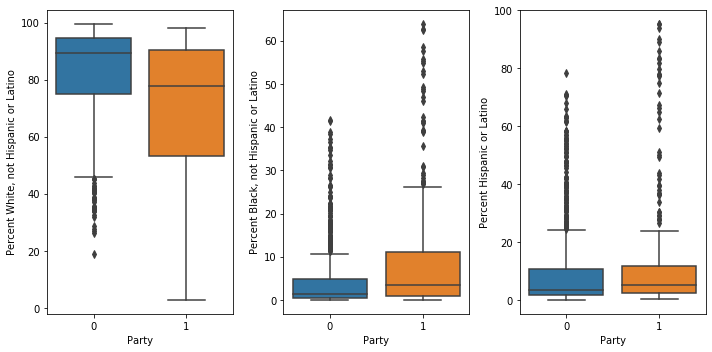

In [28]:
num_columns = len(race_data.columns)
fig, axes = plt.subplots(1, num_columns-1, figsize = (10, 5))
for i in range(num_columns-1):
    sns.boxplot(x = 'Party', y = race_data.columns[i], data = race_data, orient = 'v', ax = axes[i])
plt.tight_layout()

#### For Ethnicity (foreign born)

In [29]:
ethnic_data = merged_data[['Percent Foreign Born','Party']]
ethnic_data['Percent Not Foreign Born'] = 100 - ethnic_data['Percent Foreign Born']
ethnic_data = ethnic_data[['Percent Foreign Born','Percent Not Foreign Born','Party']]
ethnic_data.groupby('Party').describe().transpose()

Party                                    0           1
Percent Foreign Born     count  875.000000  325.000000
                         mean     3.989607    7.986330
                         std      4.497946    8.330740
                         min      0.000000    0.179769
                         25%      1.320845    2.470508
                         50%      2.326782    5.105490
                         75%      5.139964   10.144555
                         max     37.058317   52.229868
Percent Not Foreign Born count  875.000000  325.000000
                         mean    96.010393   92.013670
                         std      4.497946    8.330740
                         min     62.941683   47.770132
                         25%     94.860036   89.855445
                         50%     97.673218   94.894510
                         75%     98.679155   97.529492
                         max    100.000000   99.820231

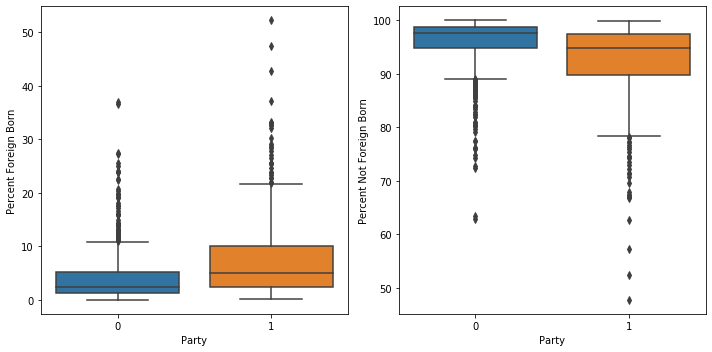

In [30]:
num_columns = len(ethnic_data.columns)
fig, axes = plt.subplots(1, num_columns-1, figsize = (10, 5))
for i in range(num_columns-1):
    sns.boxplot(x = 'Party', y = ethnic_data.columns[i], data = ethnic_data, orient = 'v', ax = axes[i])
plt.tight_layout()

#### For Education

In [31]:
education_data = merged_data[['Percent Less than High School Degree',"Percent Less than Bachelor's Degree",'Party']]
education_data.groupby('Party').describe().transpose()

Party                                                0           1
Percent Less than High School Degree count  875.000000  325.000000
                                     mean    14.029195   11.883760
                                     std      6.319875    6.505613
                                     min      2.134454    3.215803
                                     25%      9.666957    7.893714
                                     50%     12.577108   10.370080
                                     75%     17.489907   13.637059
                                     max     47.812773   49.673777
Percent Less than Bachelor's Degree  count  875.000000  325.000000
                                     mean    81.103128   71.968225
                                     std      6.842667   11.192404
                                     min     43.419470   26.335440
                                     25%     78.108767   65.711800
                                     50%     82.409455   72.736143
                                     75%     85.561291   79.903653
                                     max     97.014925   94.849957

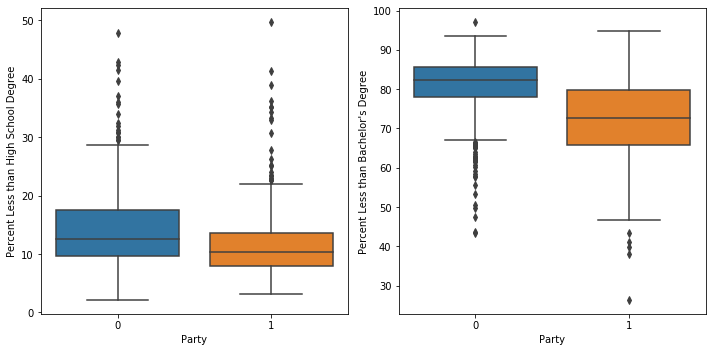

In [32]:
num_columns = len(education_data.columns)
fig, axes = plt.subplots(1, num_columns-1, figsize = (10, 5))
for i in range(num_columns-1):
    sns.boxplot(x = 'Party', y = education_data.columns[i], data = education_data, orient = 'v', ax = axes[i])
plt.tight_layout()

### Task 10 : Create choropleth map for the counties

In [38]:
fips = merged_data['FIPS']
values = merged_data['Party']
fig = ff.create_choropleth(fips=fips, values=values,colorscale=['red','blue'],title='How USA Voted',legend_title='Democratic County or Not')
fig.layout.template = None
fig.show()